# Parallel BCO Performance Analysis

This notebook loads `parallel_results.csv`, computes performance metrics, and visualizes:
- Execution Time
- Speedup
- Efficiency
- Cost

Each plot is saved under the `plots/` directory.


In [2]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load CSV
df = pd.read_csv('../parallel_results.csv')
df

,threads,plant,time
0,1,1,17.38140
1,1,2,27.07510
2,1,3,33.04160
3,2,1,9.41961
4,2,2,14.09710
5,2,3,17.36440
6,4,1,5.67891
7,4,2,8.11330
8,4,3,9.86640
9,6,1,4.72550


In [5]:
def compute_speedup(df_p):
    T1 = df_p[df_p['threads'] == 1]['time'].values[0]
    return T1 / df_p['time']

def compute_efficiency(df_p):
    return df_p['speedup'] / df_p['threads']

def compute_cost(df_p):
    return df_p['threads'] * df_p['time']

plants = {1: 'G1(s)', 2: 'G2(s)', 3: 'G3(s)'}

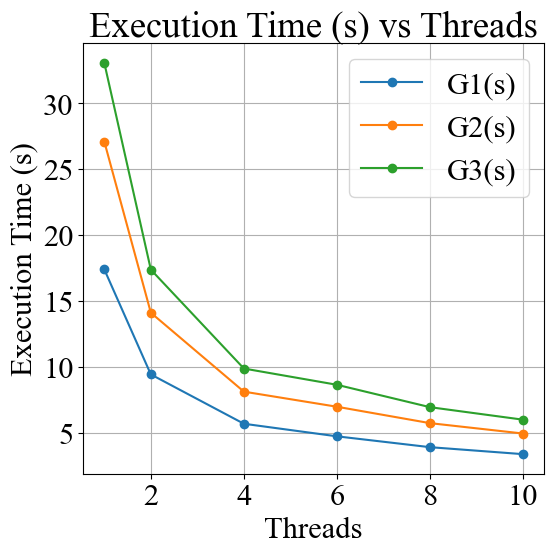

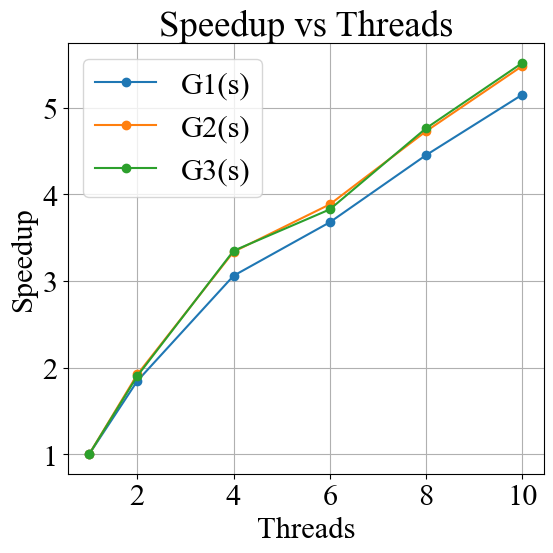

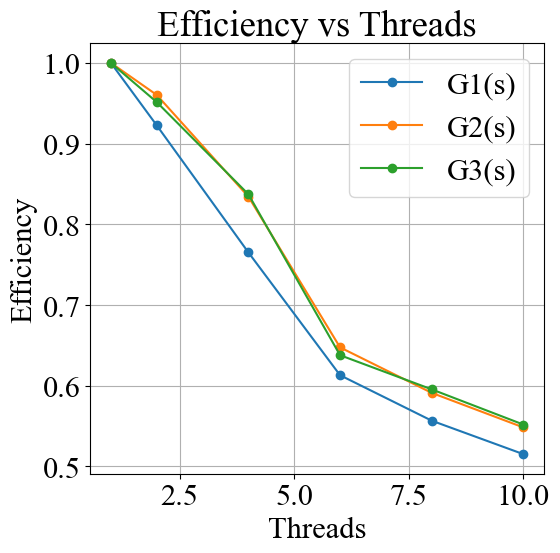

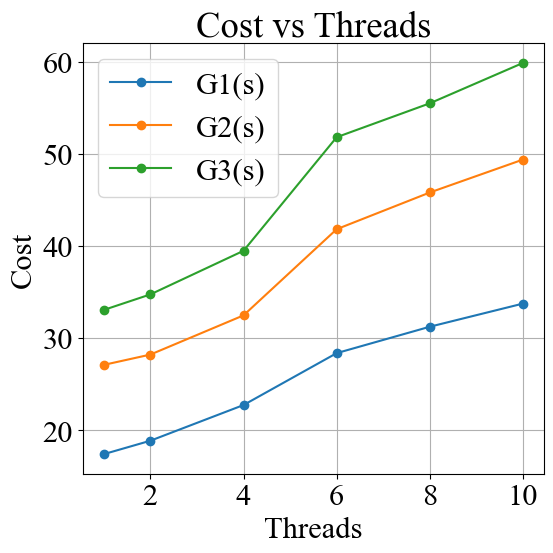

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 22

os.makedirs('plots', exist_ok=True)

# Prepare combined dataset
plants = {1: "G1(s)", 2: "G2(s)", 3: "G3(s)"}

# Dictionary to hold computed results
data = {}

for p in plants:
    df_p = df[df["plant"] == p].sort_values("threads").copy()
    df_p["speedup"] = compute_speedup(df_p)
    df_p["efficiency"] = compute_efficiency(df_p)
    df_p["cost"] = compute_cost(df_p)
    data[p] = df_p



# plotting function
def plot_all(metric, ylabel, filename):
    plt.figure(figsize=(6, 6))

    for p in plants:
        df_p = data[p]
        plt.plot(df_p["threads"], df_p[metric],
                 marker='o', label=plants[p])

    plt.xlabel("Threads")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Threads")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/{filename}.pdf")
    plt.show()


# Generate the four plots
plot_all("time", "Execution Time (s)", "execution_time")
plot_all("speedup", "Speedup", "speedup")
plot_all("efficiency", "Efficiency", "efficiency")
plot_all("cost", "Cost", "cost")
